In [100]:
import this

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
%matplotlib inline

# Loading data

In [102]:
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv"
df = pd.read_csv(url)
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


# Saving dataframe as a csv file

In [103]:
df.to_csv("dataframe.csv", index = False)
pd.set_option("display.max.columns", None)

# General overview/Checks of df

In [104]:
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [105]:
df.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [106]:
df.shape

(173, 21)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [108]:
df.isna().sum()


Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

### finding the mean of the numeric columns and replacing the na values

In [109]:
# just for Men

df.Men.mean()
mean_men = round(df.Men.mean(), 2)

In [110]:
df.Men = df.Men.fillna(mean_men)
df.isna().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     0
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [111]:
na = df.isna().sum().reset_index()
na.columns =["Variables", "Count"]
na.head()

,Variables,Count
0,Rank,0
1,Major_code,0
2,Major,0
3,Total,1
4,Men,0


In [112]:
missing = na[na["Count"]>0]
missing

,Variables,Count
3,Total,1
5,Women,1
7,ShareWomen,1


### change to an array first in order to use a for loop to find the mean and replace all at once using np.array()

In [113]:
arr = np.array(missing["Variables"])
arr

array(['Total', 'Women', 'ShareWomen'], dtype=object)

In [114]:
for i in arr:
    mean_i = round(df[i].mean(), 2)
    df[i] = df[i].fillna(mean_i)

In [115]:
df.isna().sum()

Rank                    0
Major_code              0
Major                   0
Total                   0
Men                     0
Women                   0
Major_category          0
ShareWomen              0
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

### filter for only Engineering(Question) between 1000 and 3000

In [116]:
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [117]:
df.Major_category == "Engineering"
Eng = df[df.Major_category == "Engineering"]
range_val = Eng[(Eng.Total >= 1000) & (Eng.Total <= 3000)]
range_val


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,2038,264,1449,400,0.177226,65000,50000,102000,1142,657,244
18,19,2403,ARCHITECTURAL ENGINEERING,2825.0,1835.0,990.0,Engineering,0.350442,26,2575,2277,343,1848,170,0.061931,54000,38000,65000,1665,649,137
23,24,2413,MATERIALS ENGINEERING AND MATERIALS SCIENCE,2993.0,2020.0,973.0,Engineering,0.325092,22,2449,1658,1040,1151,70,0.027789,52000,35000,62000,1911,305,70
50,51,2501,ENGINEERING AND INDUSTRIAL MANAGEMENT,2906.0,2400.0,506.0,Engineering,0.174123,29,2125,1992,462,1358,74,0.033652,44000,30000,50000,482,844,245


# Plottings(two numeric variables) using default .plot

In [146]:
# plot rank against median
#df.plot("Rank", "Median")

# Plottings(More than two numeric variables)

In [142]:
#df.plot("Rank", ["Median", "P25th", "P75th"])

# Plottings(two numeric variables) using matplotlib (.plt)

In [143]:
#plt.plot(df["Rank"], df["Median"], linestyle = "dotted")

In [144]:
#plt.plot(df["Rank"],df["Median"], linestyle = "dashed")

TypeError: 'str' object is not callable

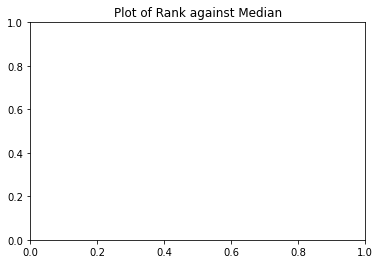

In [174]:
plt.title("Plot of Rank against Median")

plt.xlabel("Rank")
plt.ylabel("Median")

plt.plot(df["Rank"], df["Median"])

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 173 non-null    float64
 4   Men                   173 non-null    float64
 5   Women                 173 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            173 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

<AxesSubplot:ylabel='Frequency'>

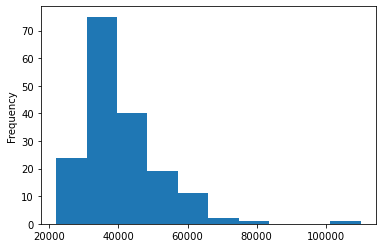

In [155]:
df.Median.plot(kind = "hist")

# how to sort values based on a column in pandas and then plotting like group by

In [163]:
top_values_by_median = df.sort_values(by = "Median", ascending = False).head()
top_values_by_median

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


<AxesSubplot:ylabel='Major'>

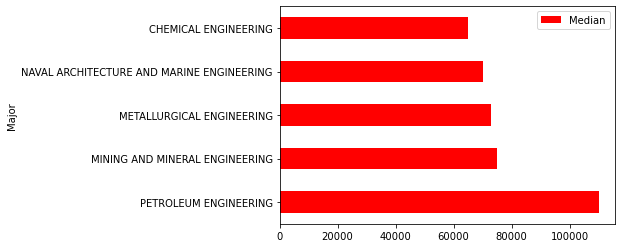

In [169]:
top_values_by_median.plot(x="Major", y="Median", kind = "barh", color = "red")

<AxesSubplot:>

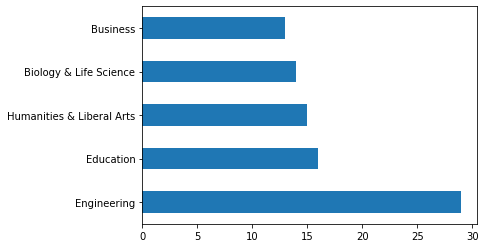

In [175]:
m_c = df["Major_category"].value_counts().head()
m_c.plot(kind="barh")